In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
from glob import glob
import IPython.display as ipd
import librosa.display

In [84]:
# Reading the normal audio files in an array.
data_dir = "0_dB_valve/valve/id_00/normal"
norm_audio_files = glob(data_dir + '/*.wav')
x = len(norm_audio_files)
x

991

In [85]:
data_dir = "0_dB_valve/valve/id_00/abnormal"
abnorm_audio_files = glob(data_dir + '/*.wav')
y = len(abnorm_audio_files)
y

119

### Display waveplot for one sound file.

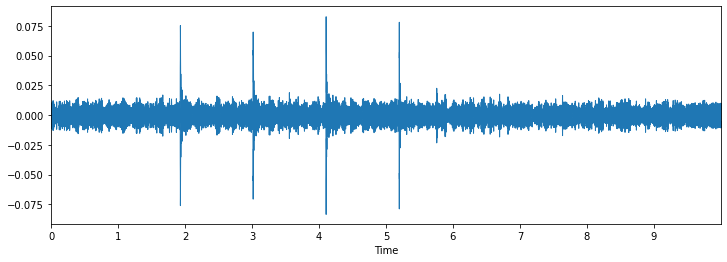

In [87]:
# Amplitude and frequency are important parameters of
# the sound and are unique for each audio.

plt.figure(figsize = (12,4))

# .load loads an audio file and decodes it into a 1-dimensional array which is a time series x ,
# and sr is a sampling rate of x . Default sris 22kHz.

data, sample_rate = librosa.load(norm_audio_files[0])

librosa.display.waveplot(data, sr=sample_rate) # is used to plot waveform of amplitude vs time
ipd.Audio(audio_files[0]) # To play an audio.

In [88]:
sample_rate

22050

In [89]:
data

array([ 0.00317084,  0.00359004,  0.00331801, ..., -0.00371406,
       -0.0052524 , -0.00363273], dtype=float32)

### Display Spectogram.

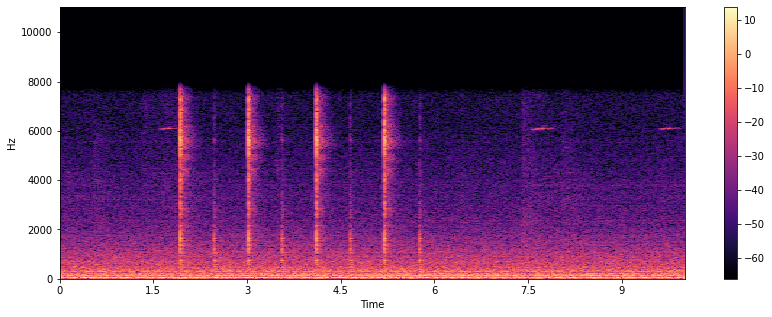

In [90]:
#display Spectrogram
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Features extraction

https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [ ]:
""" Extraction of features is a very important part in analyzing and finding relations between different things.
    The data provided of audio cannot be understood by the models directly 
    to convert them into an understandable format feature extraction is used. 
    It is a process that explains most of the data but in an understandable way. 
    Feature extraction is required for classification, prediction and recommendation algorithms.
"""

#### Zero Crossing Rate.

The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.

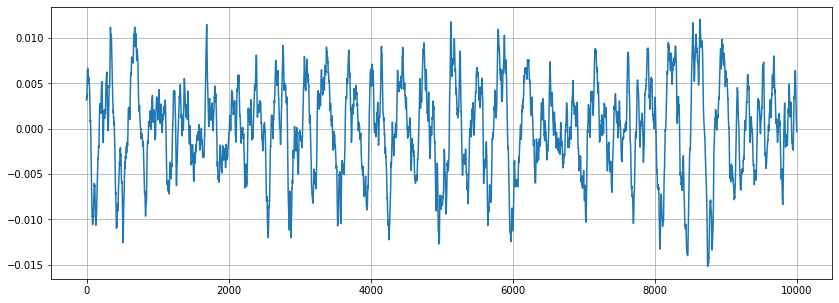

In [122]:
# Zooming in
n0 = 0
n1 = 10000
plt.figure(figsize=(14, 5))
plt.plot(data[n0:n1])
plt.grid()

As we can see there are 7 zero crossings in the given graph, when we check for 50 hz of audio file1

We can also calculate zero crossings using a given code:

In [123]:
def zero_crossing_rate(file_name):
    data, sample_rate = librosa.load(file_name)
    zero_crossings = librosa.zero_crossings(data[n0:n1], pad=False)
    return sum(zero_crossings)

#### Spectral Centroid.

It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. If the frequencies in music are same throughout then spectral centroid would be around a centre and if there are high frequencies at the end of sound then the centroid would be towards its end

In [124]:
def spec_centroid(file_name):
    data, sample_rate = librosa.load(file_name)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sample_rate)[0]
    return spectral_centroids

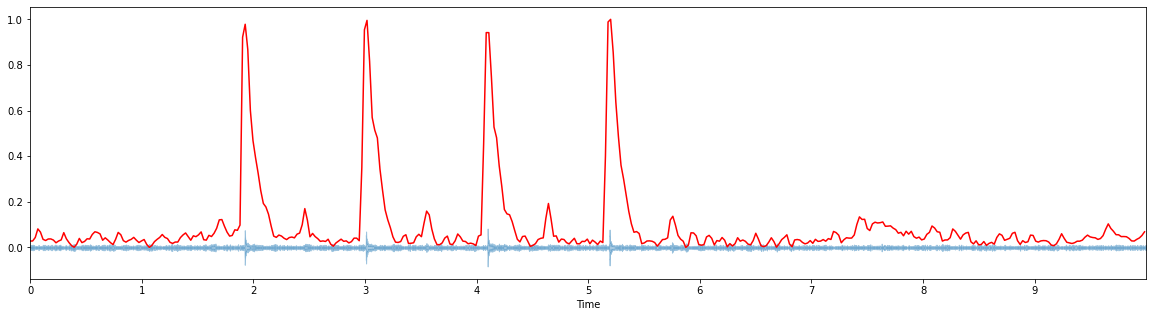

In [125]:
# Computing the time variable for visualization
plt.figure(figsize=(20,5))
import sklearn
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(data, axis=0):
    return sklearn.preprocessing.minmax_scale(data, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


#### Spectral Rolloff

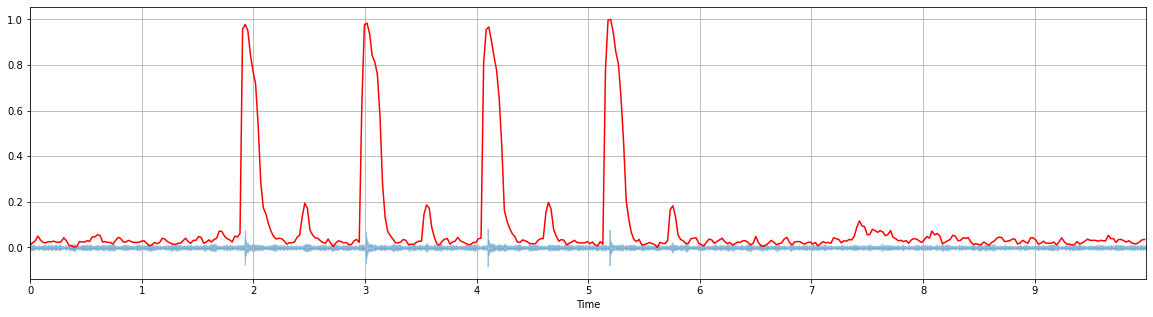

In [126]:
plt.figure(figsize=(20,5))
def spec_rolloff(file_name):
    data, sample_rate = librosa.load(file_name)
    spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sample_rate)[0]
    return  spectral_rolloff

librosa.display.waveplot(data, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

#### Root mean sqaure energy

In [132]:
# Extract RMSE with librosa

def rmse(file_name):
    data, sample_rate = librosa.load(file_name)
    rms_audio = librosa.feature.rms(y = data)[0]
    return rms_audio

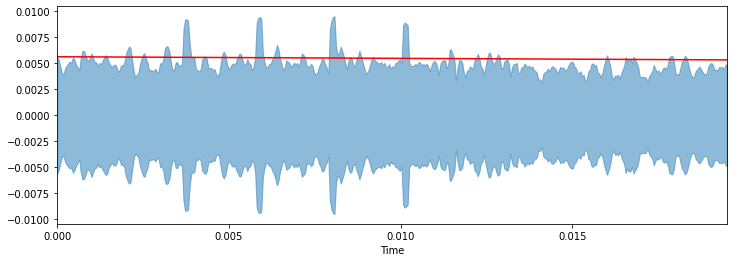

In [129]:
# Plot the RMS for an audio file

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(12,4))
librosa.display.waveplot(rms_audio,alpha = 0.5)
plt.plot(t, rms_audio,color="r")
plt.show()


Now we loop through all the normal and abnormal sound waves and create a csv file

In [135]:
# Now we iterate through every audio file in NORMAL folder and extract features
from tqdm import tqdm
extracted_feature = []
for file in tqdm(norm_audio_files):
    file_name = file
    class_label = 0 # 0 for normal.
    zcr = zero_crossing_rate(file_name)
    
    spec_cent = spec_centroid(file_name)
    spec_cent_min = spec_cent.min()
    spec_cent_max = spec_cent.max()
    spec_cent_mean = spec_cent.mean()
    spec_cent_std = spec_cent.std()
    
    spec_roll = spec_rolloff(file_name)
    spec_roll_min = spec_roll.min() 
    spec_roll_max = spec_roll.max() 
    spec_roll_mean = spec_roll.mean() 
    spec_roll_std = spec_roll.std() 
    
    rms = rmse(file_name)
    rms_mean = rms.mean()
    
    extracted_feature.append([file_name, zcr, spec_cent_max, spec_cent_min, spec_cent_mean, spec_cent_std,
                              spec_roll_max, spec_roll_min, spec_roll_mean, spec_roll_std, rmse_mean, class_label])


100%|██████████████████████████████████████████████████████████████| 991/991 [23:43<00:00,  1.44s/it]


In [136]:
# Now we iterate through every audio file in ABNORMAL folder and extract features
for file in tqdm(abnorm_audio_files):
    file_name = file
    class_label = 1 # 0 for normal.
    zcr = zero_crossing_rate(file_name)
    
    spec_cent = spec_centroid(file_name)
    spec_cent_min = spec_cent.min()
    spec_cent_max = spec_cent.max()
    spec_cent_mean = spec_cent.mean()
    spec_cent_std = spec_cent.std()
    
    spec_roll = spec_rolloff(file_name)
    spec_roll_min = spec_roll.min() 
    spec_roll_max = spec_roll.max() 
    spec_roll_mean = spec_roll.mean() 
    spec_roll_std = spec_roll.std() 
    
    rms = rmse(file_name)
    rms_mean = rms.mean()
    
    extracted_feature.append([file_name, zcr, spec_cent_max, spec_cent_min, spec_cent_mean, spec_cent_std,
                              spec_roll_max, spec_roll_min, spec_roll_mean, spec_roll_std, rmse_mean, class_label])


100%|██████████████████████████████████████████████████████████████| 119/119 [02:38<00:00,  1.33s/it]


In [137]:
extracted_features_df = pd.DataFrame(extracted_feature,columns=['file_name', 'zcr', 'spec_cent_max', 'spec_cent_min',
                                                                'spec_cent_mean', 'spec_cent_std', 'spec_roll_max', 
                                                                'spec_roll_min', 'spec_roll_mean', 'spec_roll_std', 
                                                                'rmse_mean', 'class'])
extracted_features_df.head()
    

,file_name,zcr,spec_cent_max,spec_cent_min,spec_cent_mean,spec_cent_std,spec_roll_max,spec_roll_min,spec_roll_mean,spec_roll_std,rmse_mean,class
0,0_dB_valve/valve/id_00/normal/00000773.wav,193,3979.841896,534.462569,842.763456,576.068203,6384.594727,559.863281,1104.613351,1206.337228,0.004988,0
1,0_dB_valve/valve/id_00/normal/00000632.wav,1084,4004.789910,1289.842708,1608.087992,445.638300,6384.594727,1733.422852,2564.174827,896.560428,0.004988,0
2,0_dB_valve/valve/id_00/normal/00000238.wav,507,3856.389818,893.401721,1333.155533,615.625554,6384.594727,1485.791016,2285.567154,1210.874875,0.004988,0
3,0_dB_valve/valve/id_00/normal/00000148.wav,552,3937.072218,926.309215,1352.008946,632.210185,6384.594727,1507.324219,2294.685042,1229.337405,0.004988,0
4,0_dB_valve/valve/id_00/normal/00000388.wav,583,4029.456123,1269.865358,1674.007315,561.092187,6556.860352,1744.189453,2856.172056,1119.337739,0.004988,0


In [138]:
df = extracted_features_df
df.shape

(1110, 12)